In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from keras.callbacks import EarlyStopping


In [ ]:
EarlyStopping = EarlyStopping(monitor='accuracy',patience=5,restore_best_weights=True)

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"deobhog1234","key":"f2625acefeae55a4b135febb5aacccfe"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d kaustubhb999/tomatoleaf


Dataset URL: https://www.kaggle.com/datasets/kaustubhb999/tomatoleaf
License(s): CC0-1.0
 85% 152M/179M [00:00<00:00, 1.59GB/s]
100% 179M/179M [00:00<00:00, 1.44GB/s]


In [ ]:

import zipfile
zip_ref = zipfile.ZipFile('/content/tomatoleaf.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,Rescaling,BatchNormalization
from keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
tf.random.set_seed(42)



In [ ]:
print(tf.__version__)
print(keras.__version__)
print(np.__version__)

2.19.0
3.10.0
2.0.2


In [ ]:
base_model = ResNet50(weights = 'imagenet',include_top = False,input_shape = (224,224,3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model.trainable = True
set_trainable = False
for layer in base_model.layers:
  if layer.name == 'conv5_block1_out':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False



In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/tomato/train',
    image_size = (224,224),
    batch_size = 32,
    label_mode = 'categorical'
)

Found 10000 files belonging to 10 classes.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/tomato/val',
    image_size = (224,224),
    batch_size = 32,
    label_mode = 'categorical'
)

Found 1000 files belonging to 10 classes.


In [ ]:
model = Sequential()
model.add(base_model)
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(10,activation = 'softmax'))

In [ ]:
train_ds.class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [ ]:
os.listdir('/content/tomato/train')

['Tomato___Late_blight',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Target_Spot',
 'Tomato___Bacterial_spot',
 'Tomato___Septoria_leaf_spot',
 'Tomato___healthy',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Early_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [ ]:
model.compile(optimizer = 'adamW',loss = 'categorical_crossentropy',metrics = ['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [ ]:
history = model.fit(train_ds,batch_size = 32,epochs = 10,validation_data = val_ds,callbacks=[EarlyStopping])

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 68s 163ms/step - accuracy: 0.8500 - loss: 0.5212 - precision_2: 0.8929 - recall: 0.8178 - val_accuracy: 0.9370 - val_loss: 0.2099 - val_precision_2: 0.9461 - val_recall: 0.9300
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 120ms/step - accuracy: 0.9836 - loss: 0.0638 - precision_2: 0.9864 - recall: 0.9822 - val_accuracy: 0.9380 - val_loss: 0.3312 - val_precision_2: 0.9417 - val_recall: 0.9370
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 118ms/step - accuracy: 0.9894 - loss: 0.0334 - precision_2: 0.9917 - recall: 0.9893 - val_accuracy: 0.9530 - val_loss: 0.1670 - val_precision_2: 0.9636 - val_recall: 0.9520
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 117ms/step - accuracy: 0.9907 - loss: 0.0359 - precision_2: 0.9918 - recall: 0.9902 - val_accuracy: 0.8810 - val_loss: 1.4278 - val_precision_2: 0.8874 - val_recall: 0.8750
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 118ms/step - accuracy: 0.9875 - loss: 0.0448 - precision_2: 0.9886 - recall: 0.9863 - va

In [ ]:
evaluation = model.evaluate(val_ds)

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.9536 - loss: 0.1871 - precision_2: 0.9583 - recall: 0.9535


In [ ]:
history.history

{'accuracy': [0.9919999837875366,
  0.9990000128746033,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.026794003322720528,
  0.00209914892911911,
  5.7371049479115754e-05,
  3.56146733793139e-06,
  2.9922459816589253e-06,
  2.750926114458707e-06,
  2.5712110982567538e-06,
  2.4164053229469573e-06,
  2.2853123482491355e-06,
  2.113584969265503e-06],
 'precision': [0.9919999837875366,
  0.9990000128746033,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'val_loss': [0.00039330279105342925,
  3.84007471438963e-05,
  4.016477305412991e-06,
  3.032760332644102e-06,
  2.7721364403987536e-06,
  2.5865831503324443e-06,
  2.432610926916823e-06,
  2.3044976842356846e-06,
  2.198069978476269e-06,
  2.004774160013767e-06],
 'val_precision': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}

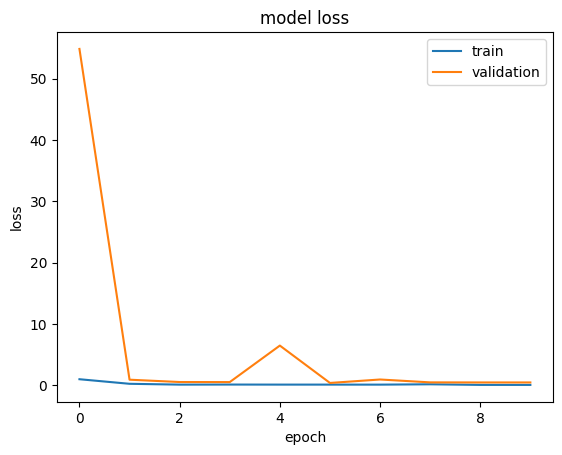

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

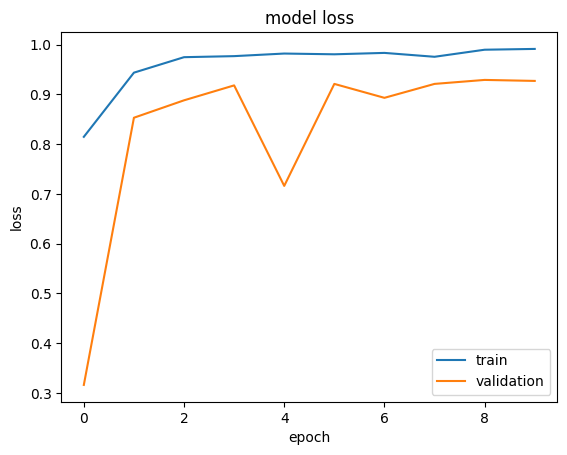

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
y_prob = model.predict(val_ds)
y_prob[0]

32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 214ms/step


array([7.5604274e-13, 6.7920068e-05, 3.4843916e-11, 4.2344668e-06,
       9.9992788e-01, 1.2410870e-13, 1.0222218e-08, 3.9727658e-17,
       3.1818754e-08, 7.2853473e-11], dtype=float32)

In [ ]:
y_pred = np.argmax(y_prob,axis = 1)

In [ ]:
y_pred

array([4, 9, 7, 3, 8, 1, 8, 1, 4, 6, 5, 7, 7, 1, 9, 8, 6, 4, 7, 2, 7, 5,
       8, 0, 5, 5, 4, 5, 0, 3, 4, 7, 2, 8, 2, 1, 3, 0, 7, 1, 3, 3, 5, 4,
       5, 5, 0, 5, 7, 3, 1, 1, 0, 4, 1, 0, 9, 5, 3, 5, 7, 2, 5, 0, 1, 1,
       0, 6, 0, 1, 7, 3, 0, 0, 3, 3, 9, 2, 8, 7, 3, 2, 6, 3, 1, 7, 0, 5,
       8, 2, 3, 0, 0, 4, 4, 3, 5, 1, 0, 7, 6, 9, 0, 5, 0, 1, 3, 8, 0, 1,
       0, 3, 7, 9, 0, 9, 6, 7, 4, 3, 9, 0, 6, 4, 0, 7, 0, 6, 0, 5, 1, 9,
       6, 2, 7, 0, 6, 7, 5, 6, 8, 1, 4, 9, 3, 3, 9, 7, 6, 8, 8, 4, 8, 7,
       1, 2, 1, 4, 4, 3, 4, 2, 0, 6, 5, 0, 2, 6, 9, 2, 7, 0, 1, 1, 7, 0,
       8, 1, 9, 9, 0, 8, 5, 0, 6, 7, 1, 9, 5, 7, 7, 8, 2, 1, 8, 1, 0, 1,
       0, 7, 9, 4, 2, 8, 9, 8, 0, 5, 8, 2, 0, 8, 9, 4, 4, 1, 0, 8, 7, 9,
       4, 3, 5, 1, 6, 1, 9, 4, 0, 1, 0, 2, 1, 0, 5, 0, 2, 5, 7, 9, 0, 8,
       2, 0, 6, 5, 9, 1, 9, 9, 8, 8, 9, 6, 1, 0, 7, 0, 2, 1, 1, 4, 3, 2,
       6, 0, 4, 0, 0, 4, 6, 5, 3, 3, 6, 5, 4, 9, 4, 0, 7, 1, 4, 5, 9, 8,
       1, 5, 1, 9, 6, 9, 6, 3, 7, 6, 7, 1, 3, 3, 8,

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  # Load and preprocess the image
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0) # Create a batch

  # Predict with the model
  prediction = model.predict(img_array)

  # Get the predicted class
  predicted_class_index = np.argmax(prediction)
  print(f"Prediction for {fn}: {prediction}")
  print(f"Predicted class index: {predicted_class_index}")

  # Optionally, you can map the index to a class name if you have them
  # class_names = sorted(os.listdir('/content/tomato/train')) # Assuming you want to get class names from the training directory
  # print(f"Predicted class name: {class_names[predicted_class_index]}")

Saving Screenshot 2025-12-30 194616.png to Screenshot 2025-12-30 194616.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediction for Screenshot 2025-12-30 194616.png: [[3.3355765e-33 2.4167765e-23 6.4737954e-17 1.0000000e+00 2.3003827e-17
  3.1483164e-26 4.8143345e-23 1.7370196e-28 2.5004055e-14 1.7266840e-24]]
Predicted class index: 3


You can save your trained Keras model to disk in several formats. The most common and recommended format is the TensorFlow SavedModel format, but you can also save it in the older HDF5 format.

In [ ]:
# Save the model in TensorFlow SavedModel format (recommended)
model.save('my_tomato_leaf_model.keras')
print("Model saved in TensorFlow SavedModel format to 'my_tomato_leaf_model.keras'")

# To save in HDF5 format (legacy)
# model.save('my_tomato_leaf_model.h5')
# print("Model saved in HDF5 format to 'my_tomato_leaf_model.h5'")

Model saved in TensorFlow SavedModel format to 'my_tomato_leaf_model.keras'


In [ ]:
model.save('model.h5')